In [28]:
import pandas as pd


In [29]:
# Check File Path: Ensure the file is located at the specified path. If you're unsure of the current working directory, you can check it with:
import os
print(os.getcwd())


/Users/caiyunchen/Documents/GitHub/Data_Analysis_Portfolio/Analysis/Python


In [30]:
# Ensure the File Path is Correct: Make sure that the file path is either:

# An absolute path (e.g., C:/Users/YourName/Desktop/CAIYUN/PORTFOLIO/PORTFOLIO_BOOK/Cleaning/Python/Book_cleaned.xlsx), or
# A relative path from the current working directory.

# Use Raw Strings (r prefix):
# You can make the string a raw string by adding an r before the string. This tells Python to treat backslashes literally and not as escape characters.

# Replace the path with the full path to your file
df = pd.read_excel("/Users/caiyunchen/Documents/GitHub/Data_Analysis_Portfolio/Analysis/Python/Book_cleaned.xlsx")



# Display the first few rows of the DataFrame
print(df.head(10))


   Book_ID   5                                              title  \
0  2767052  16                                   The Hunger Games   
1        2  41          Harry Potter and the Order of the Phoenix   
2     2657  21                              To Kill a Mockingbird   
3     1885  19                                Pride and Prejudice   
4    41865   8                                           Twilight   
5    19063  14                                     The Book Thief   
6   170448  11                                        Animal Farm   
7    11127  24                           The Chronicles of Narnia   
8       30  69  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
9    18405  18                                 Gone with the Wind   

                                              series  \
0                                The Hunger Games #1   
1                                    Harry Potter #5   
2                              To Kill a Mockingbird   
3               

In [31]:
missing_value=df.isnull().sum()
missing_value

Book_ID                 0
5                       0
title                 197
series              29023
author                  9
rating                  0
language             3806
isbn                    0
edition             47554
pages                2347
publisher            3961
publishDate          1781
firstPublishDate    21327
numRatings              0
likedPercent          622
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [32]:
df.describe()

,Book_ID,5,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,5.247800e+04,52478.000000,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,1.046889e+07,24.019742,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,1.208011e+07,20.617561,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.732408e+05,12.000000,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,6.443592e+06,18.000000,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,1.768628e+07,28.000000,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.572613e+07,251.000000,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


In [33]:


# Convert 'price' to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN in either 'price' or 'firstPublishDate'
df = df.dropna(subset=['price'])

# Sort by price in descending order
sorted_books = df.sort_values(by="price", ascending=False)

# Print the sorted prices and titles
print("Books sorted by price in descending order:")
print(sorted_books[['title', 'price']])


Books sorted by price in descending order:
                                                   title   price
12                                       The Giving Tree  898.64
13                                     Wuthering Heights  867.05
14                                     The Da Vinci Code  811.04
15                                   Memoirs of a Geisha  796.14
16                            The Picture of Dorian Gray  791.43
...                                                  ...     ...
38015                                           Monsters    0.84
38016               The Innovation Secrets of Steve Jobs    0.84
38017                                         Dead Sleep    0.84
38018  Technology as Magic: The Triumph of the Irrati...    0.84
38112                               Raiders from the Sea    0.84

[38101 rows x 2 columns]


In [34]:
specific_row = df.iloc[32986]
print("\nRow at index 3 using .iloc[]:")
print(specific_row)



Row at index 3 using .iloc[]:
Book_ID                                         570393
5                                                   34
title               GTO: Great Teacher Onizuka, Vol. 1
series                   GTO: Great Teacher Onizuka #1
author                                    Tru Fujisawa
rating                                            4.23
language                                       English
isbn                                     9781931514934
edition                                            NaN
pages                                              192
publisher                                     TokyoPop
publishDate                        2002-04-23 00:00:00
firstPublishDate                   1997-05-16 00:00:00
numRatings                                        4760
likedPercent                                      94.0
bbeScore                                            92
bbeVotes                                             1
price                             

In [35]:
# # Find the rows where the price is 50.00
# price_50 = df[df['price'] == 50.00]
# print("\nBooks with a price of 50.00:")
# print(price_50)


In [36]:
# # Find rows where the first publish date is after 1980
# recent_books = df[df['firstPublishDate'] > '1980-01-01']
# print("\nBooks published after 1980:")
# print(recent_books)


In [37]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl



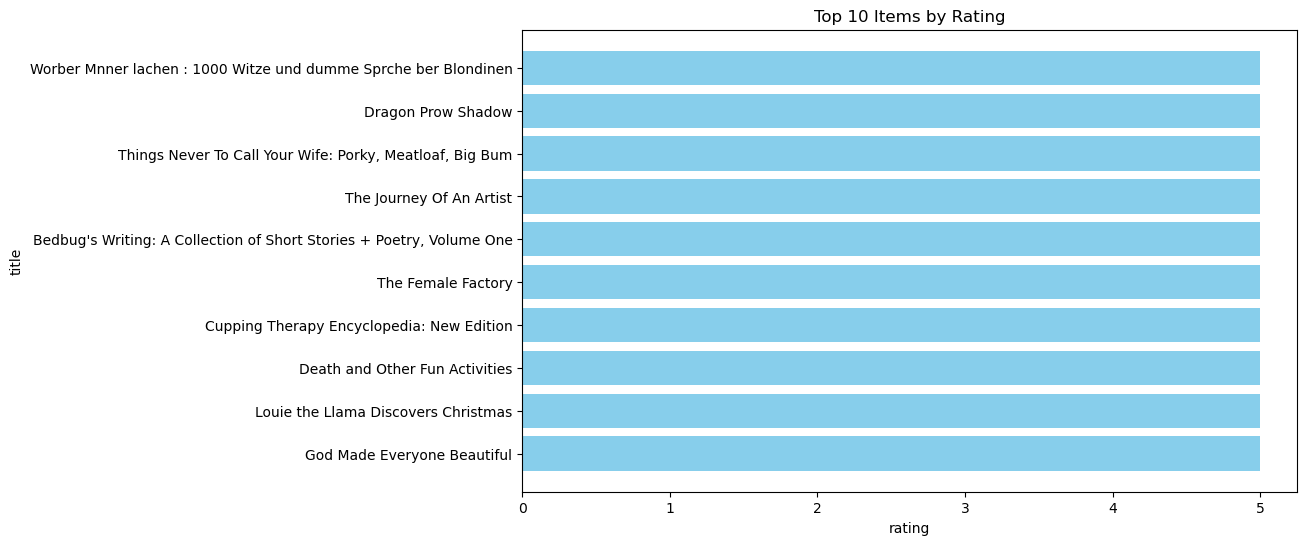

In [38]:
top_ranking = df.sort_values(by="rating", ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_ranking["title"], top_ranking["rating"], color="skyblue")
plt.xlabel("rating")
plt.ylabel("title")
plt.title("Top 10 Items by Rating")
plt.gca().invert_yaxis()  # Highest rated at the top
plt.show()

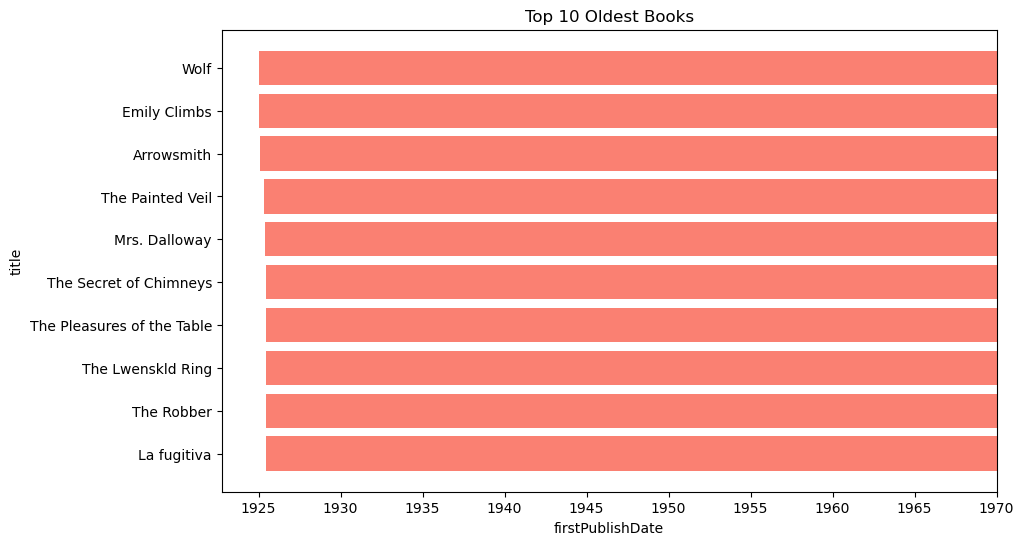

In [39]:
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# Sort by publication year and select the 10 oldest books
oldest_books = df.sort_values(by="firstPublishDate").head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(oldest_books["title"], oldest_books["firstPublishDate"], color="salmon")
plt.xlabel("firstPublishDate")
plt.ylabel("title")
plt.title("Top 10 Oldest Books")
plt.gca().invert_yaxis()  # Oldest book at the top
plt.show()


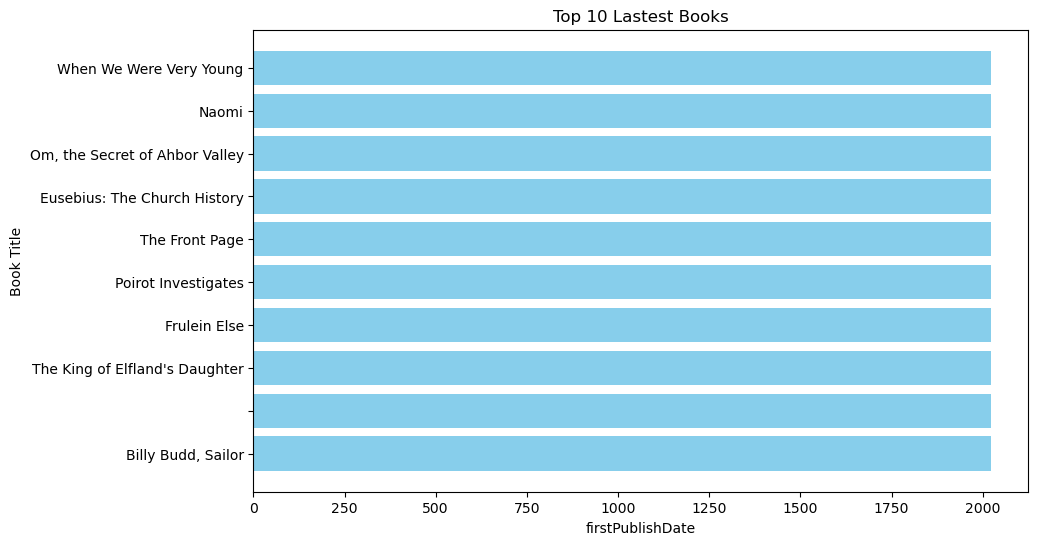

In [40]:

# Convert 'firstPublishDate' to datetime format
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')
df = df.dropna(subset=['firstPublishDate', 'title']).copy()


# Sort by publication date in descending order and select the 10 newest books
Latest_books = df.sort_values(by="firstPublishDate", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(Latest_books["title"], Latest_books["firstPublishDate"].dt.year, color="skyblue")
plt.xlabel("firstPublishDate")
plt.ylabel("Book Title")
plt.title("Top 10 Lastest Books")
plt.gca().invert_yaxis()  # Newest book at the top
plt.show()


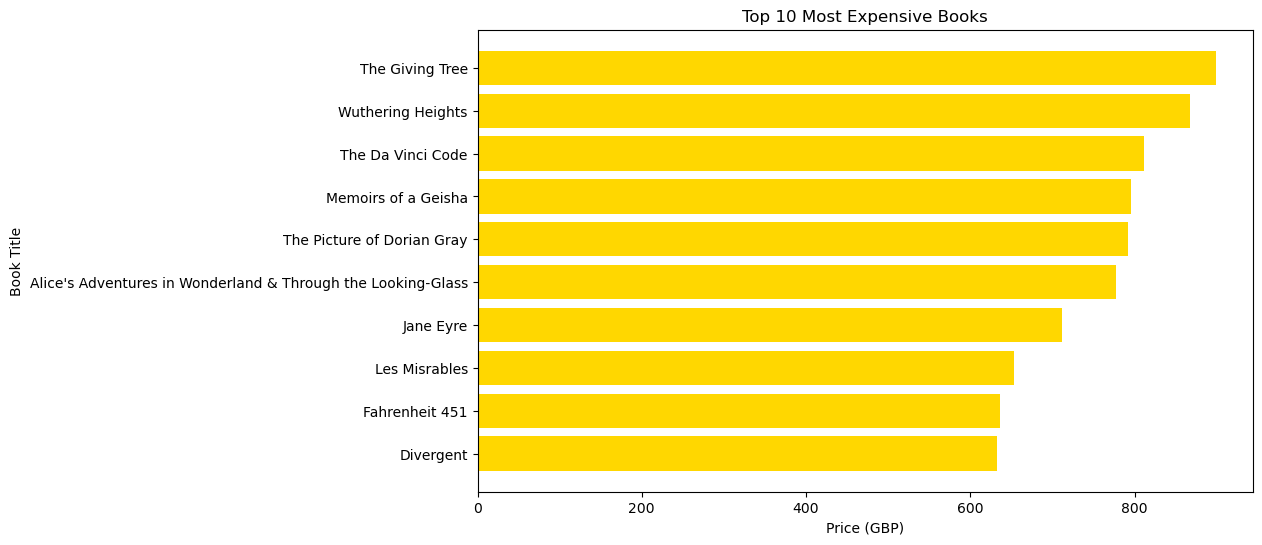

In [56]:


# Convert 'firstPublishDate' to datetime format
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# Convert 'price' to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN in either 'price' or 'firstPublishDate'
df = df.dropna(subset=['price', 'firstPublishDate'])

# Sort by price in descending order and select the 10 most expensive books
most_expensive_books = df.sort_values(by="price", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(most_expensive_books["title"], most_expensive_books["price"], color="gold")
plt.xlabel("Price (GBP)")
plt.ylabel("Book Title")
plt.title("Top 10 Most Expensive Books")
plt.gca().invert_yaxis()  # Most expensive book at the top
plt.show()


In [42]:
# Sort DataFrame by 'price' column in descending order

df.price

12       898.64
13       867.05
14       811.04
15       796.14
16       791.43
          ...  
38106      0.84
38108      0.84
38109      0.84
38110      0.84
38111      0.84
Name: price, Length: 22304, dtype: float64

In [43]:
## Define the price range
min_price = 200  # replace with your minimum price
max_price = 900  # replace with your maximum price

# Filter rows where 'price' is within the specified range and include 'book title'
price_range_df = df.loc[(df['price'] >= min_price) & (df['price'] <= max_price), ['title', 'price']]

# Display the filtered DataFrame
print(price_range_df)


                                                 title   price
12                                     The Giving Tree  898.64
13                                   Wuthering Heights  867.05
14                                   The Da Vinci Code  811.04
15                                 Memoirs of a Geisha  796.14
16                          The Picture of Dorian Gray  791.43
..                                                 ...     ...
120  The Curious Incident of the Dog in the Night-Time  210.00
121                        The Very Hungry Caterpillar  208.00
122                               Tuesdays with Morrie  203.55
123                  The Unbearable Lightness of Being  203.26
124                               The Name of the Rose  202.62

[107 rows x 2 columns]


In [44]:
df.Book_ID[32984]

640975

In [58]:

# Copy rows where book name is 'Chicago'
copied_rows = df[df['title'] == 'The Giving Tree'].copy()
print(copied_rows)


    Book_ID   5            title series            author  rating language  \
12   370493  15  The Giving Tree    NaN  Shel Silverstein    4.37  English   

             isbn edition pages                 publisher  \
12  9780060256654     NaN    64  HarperCollins Publishers   

            publishDate firstPublishDate  numRatings  likedPercent  bbeScore  \
12  1964-07-10 00:00:00       1964-10-28      905731          94.0   1021534   

    bbeVotes   price  
12     10594  898.64  
